# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
data=[]
i=0
for city in cities:
#    print(city)
    json = requests.get(query_url + city).json()
    i=i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")

counter 1 || saint-philippe
counter 2 || barrow
counter 3 || punta arenas
counter 4 || busselton
counter 5 || nikolskoye
counter 6 || vikramasingapuram
counter 7 || taltal
counter 8 || new norfolk
counter 9 || mataura
counter 10 || ushuaia
counter 11 || georgetown
counter 12 || souillac
counter 13 || axim
counter 14 || port elizabeth
counter 15 || carnarvon
counter 16 || rikitea
city not found
counter 18 || cape town
counter 19 || sakakah
counter 20 || bluff
counter 21 || diamantino
counter 22 || sydney mines
counter 23 || puerto ayora
counter 24 || bredasdorp
counter 25 || hobart
counter 26 || porangatu
counter 27 || tasiilaq
counter 28 || jamestown
counter 29 || chokurdakh
counter 30 || kingori
counter 31 || tocopilla
counter 32 || sambava
counter 33 || ode
counter 34 || sitka
counter 35 || vostok
counter 36 || marathon
counter 37 || leningradskiy
city not found
counter 39 || lillesand
counter 40 || atuona
counter 41 || kaitangata
counter 42 || hilo
counter 43 || foz do iguacu
city n

counter 351 || saldanha
counter 352 || seredka
counter 353 || buncrana
counter 354 || butte
counter 355 || joshimath
counter 356 || nemuro
counter 357 || kochki
counter 358 || menongue
city not found
counter 360 || conde
counter 361 || lively
counter 362 || port augusta
counter 363 || umm kaddadah
counter 364 || emerald
counter 365 || bria
counter 366 || mastic beach
counter 367 || lyuban
counter 368 || poum
counter 369 || puri
counter 370 || russell
counter 371 || guasdualito
counter 372 || norman wells
counter 373 || jahanabad
counter 374 || tornio
city not found
counter 376 || martapura
counter 377 || vicam
counter 378 || vega de alatorre
counter 379 || margate
city not found
city not found
counter 382 || porto novo
counter 383 || lorengau
counter 384 || gat
counter 385 || kabalo
counter 386 || labuhan
city not found
counter 388 || anchorage
counter 389 || nouadhibou
counter 390 || aklavik
counter 391 || belaya gora
counter 392 || banjar
counter 393 || kenai
counter 394 || luanda
co

# Convert Raw Data to DataFrame

In [15]:
csvpath = '/output'
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.to_csv("output/cities_load.csv")
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,44,RE,1594259064,64,-21.36,55.77,21.00,5.10
1,barrow,1,US,1594259081,70,71.29,-156.79,8.00,8.20
2,punta arenas,19,CL,1594258885,92,-53.15,-70.92,-2.00,5.10
3,busselton,12,AU,1594259184,85,-33.65,115.33,11.11,1.98
4,nikolskoye,74,RU,1594259091,87,59.70,30.79,11.00,2.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

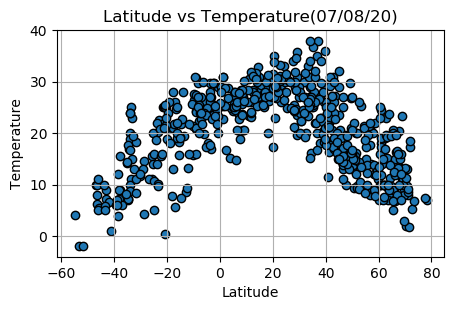

In [77]:
x = data_df['Lat']
y = data_df['Max Temp']
plt.scatter(x, y,edgecolors='k')
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.title('Latitude vs Temperature(07/08/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("citylatvstemp.png")
plt.show()

#### Latitude vs. Humidity Plot

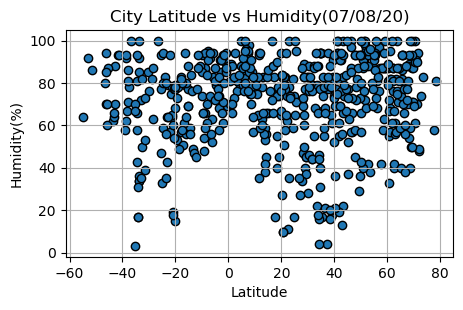

<Figure size 500x300 with 0 Axes>

In [76]:
x = data_df['Lat']
y = data_df['Humidity']
plt.scatter(x, y,edgecolors='k')
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.title('City Latitude vs Humidity(07/08/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.show()
plt.savefig("cityvshum.png")

#### Latitude vs. Cloudiness Plot

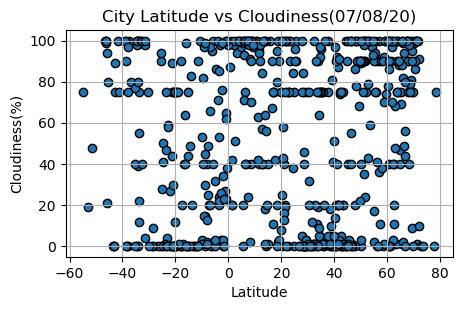

In [75]:
x = data_df['Lat']
y = data_df['Cloudiness']
plt.scatter(x, y,edgecolors='k')
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.title('City Latitude vs Cloudiness(07/08/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.savefig("citylatvscloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

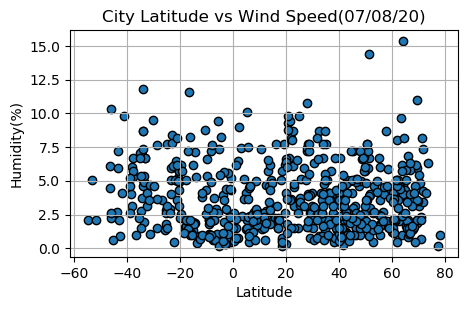

<Figure size 500x300 with 0 Axes>

In [74]:
x = data_df['Lat']
y = data_df['Wind Speed']
plt.scatter(x, y,edgecolors='k')
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.title('City Latitude vs Wind Speed(07/08/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.show()
plt.savefig("citylatvswind.png")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots
def makelingress(X,y):
    

In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


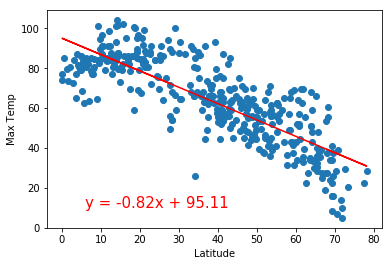

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


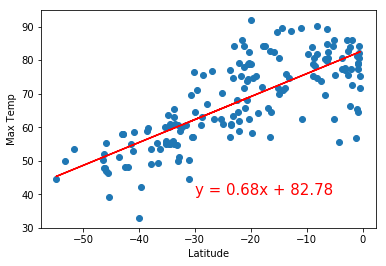

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


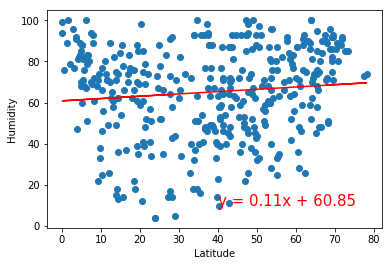

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


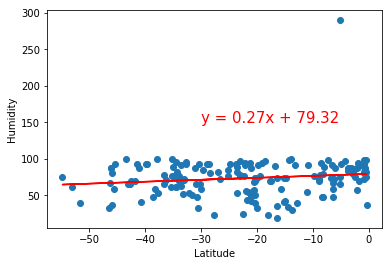

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


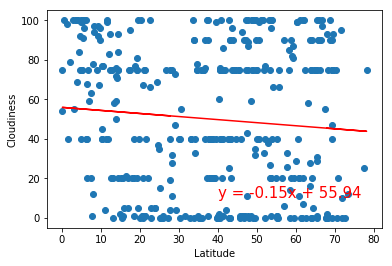

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


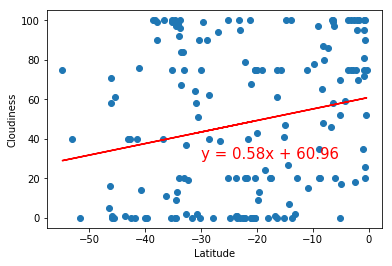

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


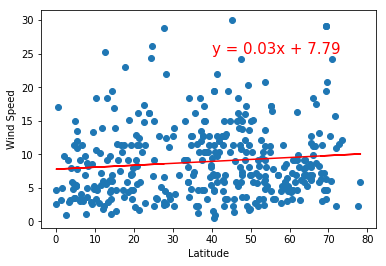

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


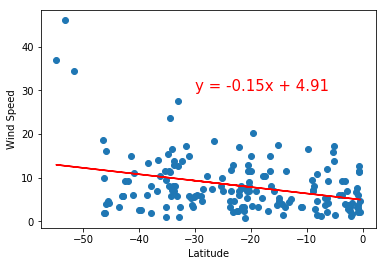